# gssnng
Gene Set Scoring on the Nearest Neighbor Graph (gssnng) for Single Cell RNA-seq (scRNA-seq)
Works with AnnData objects stored as h5ad files. Takes values from adata.X.

The method works by sampling nearest neighbors for each cell, creating a mini-pseudobulk expression profile, and performing single sample gene set scoring.  This gives each cell a score and preserves gradients across clusters. 

https://github.com/Gibbsdavidl/gssnng

Notebook author: David L Gibbs (david.gibbs@isbscience.org)

In [ ]:
# first let's install the package from github
# and clone the repo for the example data
!pip install git+https://github.com/Gibbsdavidl/gssnng
!git clone https://github.com/Gibbsdavidl/gssnng

In [1]:
from gssnng import score_cells
import scanpy as sc
import matplotlib
%matplotlib inline

In [4]:
# these file paths point to the cloned repo from above
anndata_file = '../gssnng/test/data/pbmc3k_processed.h5ad'
gene_set_file = "../gssnng/test/data/cibersort_lm22.gmt"
gene_set_names = ['B.cells.naive.up', 'B.cells.memory.up', 'Plasma.cells.up', 'T.cells.CD8.up', 'T.cells.CD4.naive.up', 'T.cells.CD4.memory.resting.up', 'T.cells.CD4.memory.activated.up', 'T.cells.follicular.helper.up', 'T.cells.regulatory..Tregs.up', 'T.cells.gamma.delta.up', 'NK.cells.resting.up', 'NK.cells.activated.up', 'Monocytes.up', 'Macrophages.M0.up', 'Macrophages.M1.up', 'Macrophages.M2.up', 'Dendritic.cells.resting.up', 'Dendritic.cells.activated.up', 'Mast.cells.resting.up', 'Mast.cells.activated.up', 'Eosinophils.up', 'Neutrophils.up']

In [5]:
# read in the 10x genomics example data set, same as used in the scanpy tuts
q = sc.read_h5ad(anndata_file)
# recompute the nearest neighbor graph to give plenty of neighbors to each cell
sc.pp.neighbors(q, n_neighbors=32)

/home/daveg/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/daveg/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [8]:
%%timeit -n 1
# Then we'll produce a gene set score, for each cell, for each gene set in the .gmt file.
# Neighbors are sampled within the groupby parameter. Groups run in parallel, set cores parameter as appropriate.

score_cells.with_gene_sets(
        adata=q,
        gene_set_file=gene_set_file,
        groupby="louvain",
        recompute_neighbors=0,
        score_method="singscore",
        method_params={'normalization':'theoretical'},
        samp_neighbors=29,
        ranked=True,
        cores=4
    )

running CD8 T cells
running CD14+ Monocytesrunning NK cells

running B cells
running CD4 T cells
running Dendritic cells
running FCGR3A+ Monocytes
running Megakaryocytes


ValueError: columns overlap but no suffix specified: Index(['B.cells.naive.up', 'B.cells.memory.up', 'Plasma.cells.up',
       'T.cells.CD8.up', 'T.cells.CD4.naive.up',
       'T.cells.CD4.memory.resting.up', 'T.cells.CD4.memory.activated.up',
       'T.cells.follicular.helper.up', 'T.cells.regulatory..Tregs.up',
       'T.cells.gamma.delta.up', 'NK.cells.resting.up',
       'NK.cells.activated.up', 'Monocytes.up', 'Macrophages.M0.up',
       'Macrophages.M1.up', 'Macrophages.M2.up', 'Dendritic.cells.resting.up',
       'Dendritic.cells.activated.up', 'Mast.cells.resting.up',
       'Mast.cells.activated.up', 'Eosinophils.up', 'Neutrophils.up'],
      dtype='object')

In [5]:
# each gene set is saved as a column in the AnnData.obs data.frame
q.obs

,n_genes,percent_mito,n_counts,louvain,B.cells.naive.up,B.cells.memory.up,Plasma.cells.up,T.cells.CD8.up,T.cells.CD4.naive.up,T.cells.CD4.memory.resting.up,...,Monocytes.up,Macrophages.M0.up,Macrophages.M1.up,Macrophages.M2.up,Dendritic.cells.resting.up,Dendritic.cells.activated.up,Mast.cells.resting.up,Mast.cells.activated.up,Eosinophils.up,Neutrophils.up
index,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells,-0.215255,-0.212931,-0.151355,-0.093891,0.012276,-0.001230,...,-0.338124,-0.277046,-0.054324,-0.311505,-0.262348,-0.119923,-0.164380,-0.154635,-0.156353,-0.238810
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells,0.437548,0.468913,0.404527,-0.055995,0.084246,0.011906,...,-0.137658,-0.115337,0.083690,-0.042467,-0.110266,0.009330,-0.136800,-0.098245,0.080269,-0.142082
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells,-0.137891,-0.107654,-0.179746,-0.056426,0.151104,0.026026,...,-0.366218,-0.233954,-0.143555,-0.284852,-0.294715,-0.165992,-0.253019,-0.179795,-0.149492,-0.252264
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes,-0.241777,-0.190879,-0.256070,-0.311115,-0.308279,-0.362707,...,0.263687,0.245873,0.054873,0.187226,0.143247,0.054645,0.093510,0.074767,-0.044834,0.254839
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells,-0.291729,-0.312475,-0.182135,0.218218,-0.154208,-0.015321,...,-0.338296,-0.242966,-0.060614,-0.256312,-0.130132,-0.034715,-0.049568,-0.042622,-0.229830,-0.269451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes,-0.172432,-0.170455,-0.142387,-0.319763,-0.335798,-0.335595,...,0.137761,0.109394,-0.017937,0.149870,0.164535,-0.046000,0.055742,0.143555,0.014750,0.129872
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells,0.313324,0.289022,0.401472,-0.133920,-0.098759,-0.115144,...,-0.245918,-0.147899,-0.058054,-0.116218,-0.175970,-0.087404,-0.181703,-0.186634,-0.197379,-0.246824
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells,0.349281,0.349720,0.300047,-0.202695,-0.089084,-0.143037,...,-0.101262,-0.031221,0.080911,-0.049499,-0.091046,0.033445,-0.171892,-0.117480,0.069909,-0.067460


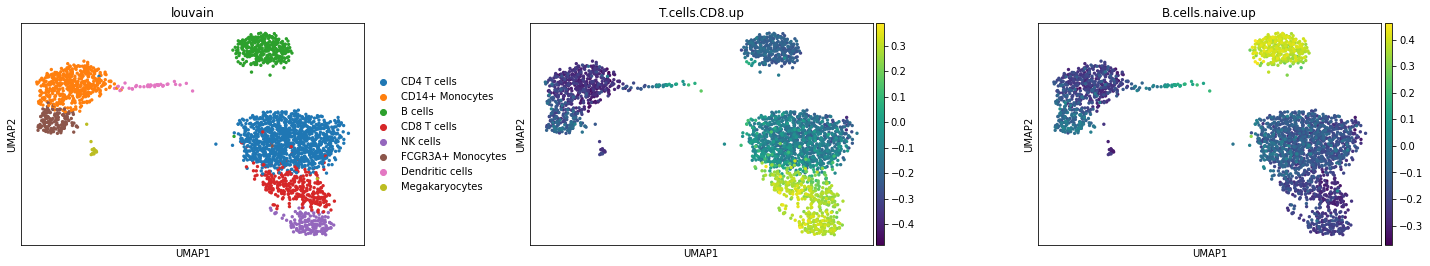

In [6]:
# let's visualize the scores
sc.pl.umap(q, color=['louvain','T.cells.CD8.up','B.cells.naive.up'], wspace=0.35)

---

###########  THE TOUR OF METHODS #################

---

In [ ]:
%%timeit -n 1
### RANK BIASED OVERLAP ###
### https://dl.acm.org/doi/10.1145/1852102.1852106

# del the previous scores
#q.obs = q.obs.drop(gene_set_names, axis=1)

# rescore
score_cells.with_gene_sets(
        adata=q,
        gene_set_file=gene_set_file,
        groupby="louvain",
        recompute_neighbors=0,
        score_method="rank_biased_overlap",
        method_params={'rbo_depth':50},
        samp_neighbors=29,
        ranked=True,
        cores=6
    )

# let's visualize 
sc.pl.umap(q, color=['louvain','T.cells.CD8.up','B.cells.naive.up'], wspace=0.35)


running CD8 T cells
running CD14+ Monocytes
running NK cells
running B cells
running CD4 T cellsrunning Dendritic cells

running FCGR3A+ Monocytes
running Megakaryocytes


running B cells
running CD14+ Monocytes
running Megakaryocytesrunning Dendritic cells

running NK cells
running FCGR3A+ Monocytes
running CD8 T cells
running CD4 T cells
**done**


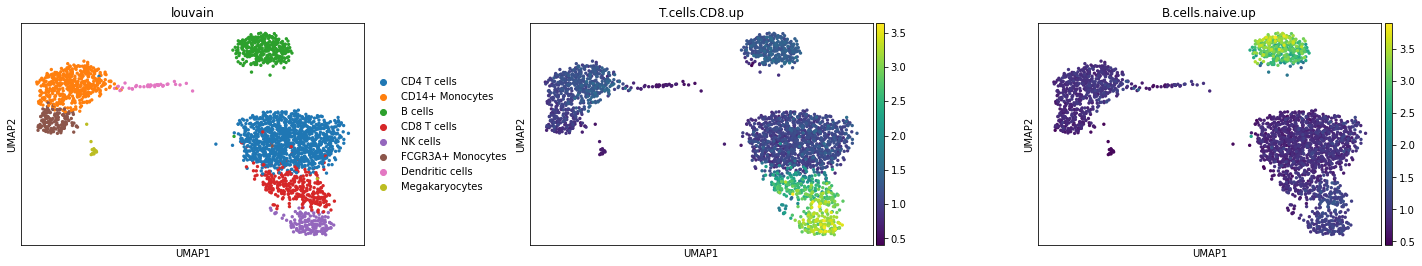

In [9]:
### MEAN Z SCORES COUNTS ###
### average of gene-wise Z scores

# del the previous scores
q.obs = q.obs.drop(gene_set_names, axis=1)

# rescore
score_cells.with_gene_sets(
        adata=q,
        gene_set_file=gene_set_file,
        groupby="louvain",
        recompute_neighbors=0,
        score_method="mean_z",
        method_params=dict(),
        samp_neighbors=29,
        ranked=False,
        cores=4
    )

# let's visualize 
sc.pl.umap(q, color=['louvain','T.cells.CD8.up','B.cells.naive.up'], wspace=0.35)

running B cells
running CD14+ Monocytesrunning Megakaryocytes

running Dendritic cells
running NK cells
running FCGR3A+ Monocytes
running CD8 T cells
running CD4 T cells
**done**


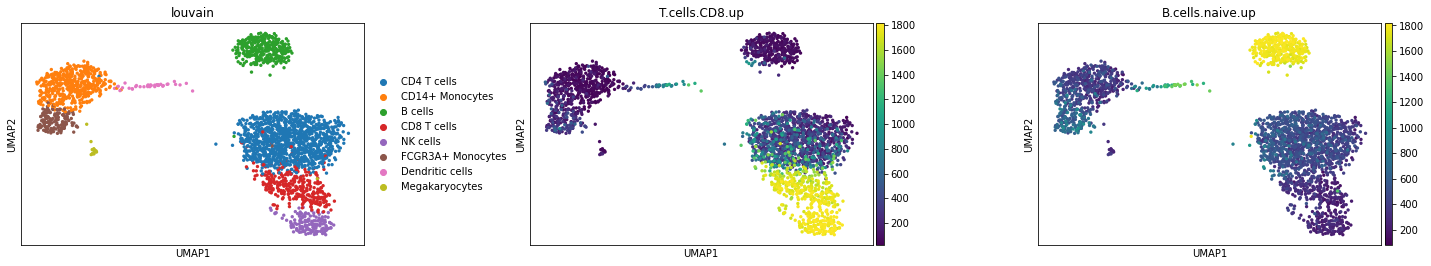

In [11]:
### MEDIAN RANKS ###

# del the previous scores
q.obs = q.obs.drop(gene_set_names, axis=1)

# rescore
score_cells.with_gene_sets(
        adata=q,
        gene_set_file=gene_set_file,
        groupby="louvain",
        recompute_neighbors=0,
        score_method="median_score",
        method_params={},
        samp_neighbors=29,
        ranked=True,
        cores=4
    )

# let's visualize 
sc.pl.umap(q, color=['louvain','T.cells.CD8.up','B.cells.naive.up'], wspace=0.35)


running B cells
running CD14+ Monocytesrunning Megakaryocytes
running Dendritic cells

running NK cells
running FCGR3A+ Monocytes
running CD8 T cells
running CD4 T cells
**done**


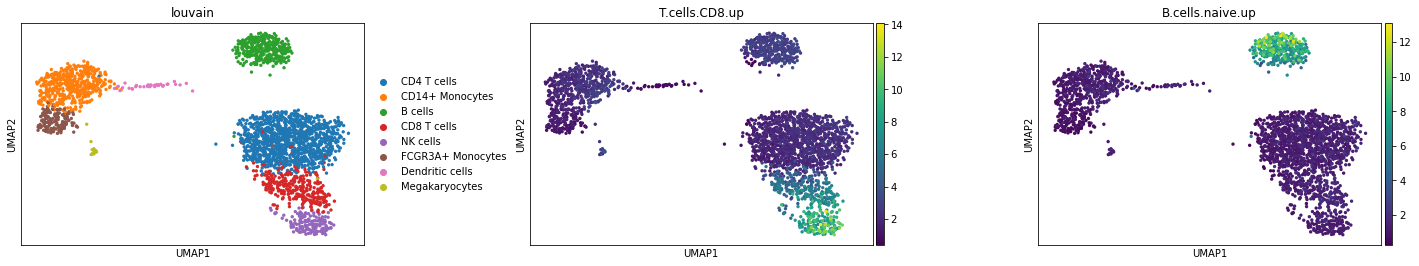

In [8]:
# ROBUST STANDARDIZED COUNTS

# del the previous scores
q.obs = q.obs.drop(gene_set_names, axis=1)

# rescore
score_cells.with_gene_sets(
        adata=q,
        gene_set_file=gene_set_file,
        groupby="louvain",
        recompute_neighbors=0,
        score_method="robust_std",
        method_params=dict(),
        samp_neighbors=29,
        ranked=False,
        cores=4
    )

# let's visualize 
sc.pl.umap(q, color=['louvain','T.cells.CD8.up','B.cells.naive.up'], wspace=0.35)

running B cells
running Megakaryocytesrunning CD14+ Monocytes

running Dendritic cells
running NK cells
running FCGR3A+ Monocytes
running CD8 T cells
running CD4 T cells
**done**


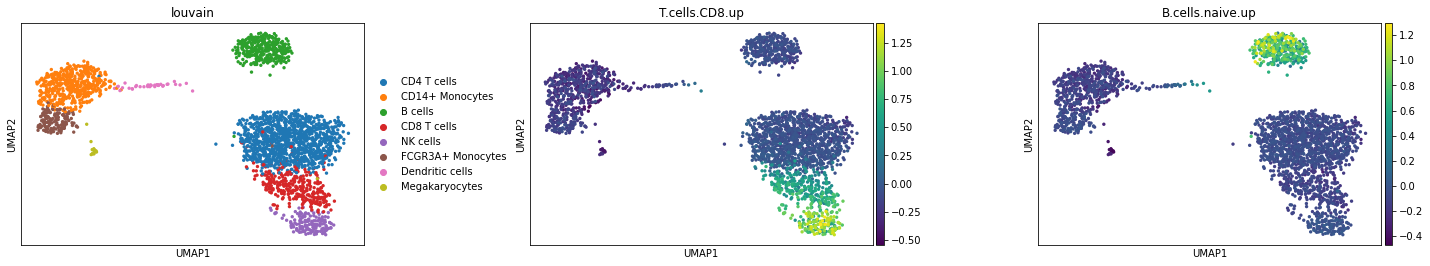

In [10]:
### AVERAGE COUNTS ###

# del the previous scores
q.obs = q.obs.drop(gene_set_names, axis=1)

# rescore
score_cells.with_gene_sets(
        adata=q,
        gene_set_file=gene_set_file,
        groupby="louvain",
        recompute_neighbors=0,
        score_method="average_score",
        method_params={},
        samp_neighbors=29,
        ranked=False,
        cores=4
    )

# let's visualize 
sc.pl.umap(q, color=['louvain','T.cells.CD8.up','B.cells.naive.up'], wspace=0.35)


running B cells
running CD14+ Monocytes
running Dendritic cellsrunning Megakaryocytes

running NK cells
running FCGR3A+ Monocytes
running CD8 T cells
running CD4 T cells
**done**


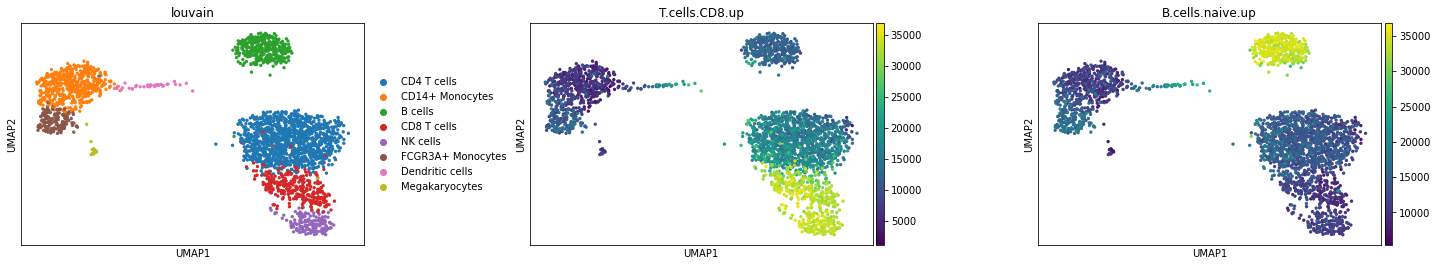

In [12]:
### SUMMED UP ###

# del the previous scores
q.obs = q.obs.drop(gene_set_names, axis=1)

# rescore
score_cells.with_gene_sets(
        adata=q,
        gene_set_file=gene_set_file,
        groupby="louvain",
        recompute_neighbors=0,
        score_method="summed_up",
        method_params={},
        samp_neighbors=29,
        ranked=True,
        cores=4
    )

# let's visualize 
sc.pl.umap(q, color=['louvain','T.cells.CD8.up','B.cells.naive.up'], wspace=0.35)